In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The data we will be using to model growth curves is from different experiments. For the detailed description of the co-culture experiments please have a look at our wiki. In short: two bacteria strains with fluorescence markers were grown together in a 96-well plate and the fluorescence measured.

Our measurements were often performed in duplicates or triplicates and therefore need to be processed in to a pandas dataframe with means and standardderivations for each condition.

In [2]:
from co_culture_data_processing.processing_excel_to_df import *

The first data we want to have a look at is the emission at 635 nm from a co-culture of E. coli DH5a with RFP and B. subtilis with GFP. 

In [3]:
file_name = "Growth_curve_data.xlsx"
sheet = "B.subtilis vs. E.coli"

df_BE = pd.read_excel(io=file_name, sheet_name=sheet)
df_BE.rename(index=df_BE["Cycle Nr."], inplace=True)
df_BE.drop(["Cycle Nr."], axis=1, inplace=True) 
df_BE = convert_time_in_df(df_BE, mod="hour")
df_BE.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0
Time [s],0.0,1067.2,2134.4,3201.7,4268.9,5336.1,6403.3,7470.5,8537.7,9605.0,...,54427.9,55495.2,56562.4,57629.6,58696.8,59764.0,60831.2,61898.4,62965.6,64032.8
Temp. [°C],37.1,37.2,37.0,37.2,37.2,37.3,37.1,36.9,37.1,37.1,...,36.9,37.2,36.8,37.1,37.2,36.9,37.1,37.1,37.0,37.3
A1,51.0,48.0,49.0,46.0,47.0,47.0,46.0,45.0,45.0,45.0,...,38.0,39.0,39.0,38.0,38.0,38.0,38.0,37.0,38.0,37.0
A2,52.0,48.0,49.0,47.0,47.0,47.0,46.0,46.0,47.0,46.0,...,40.0,39.0,40.0,39.0,40.0,39.0,39.0,39.0,39.0,39.0
A3,52.0,47.0,47.0,48.0,48.0,47.0,47.0,47.0,47.0,46.0,...,41.0,39.0,40.0,40.0,40.0,39.0,38.0,39.0,39.0,39.0


The excel sheet that we received from the tecan is now loaded, but we still need to normalize the data by substracting the blank (in our case LB medium) from the measured values. Additionally it needs to be defined in which well which samples is found. This has to be done manually in the form of a dictionary.

In [4]:
background = ["A1", "A2", "A3", "A4", "A5", "B1", "B5", "C1", "C5", "D1", "D5", "E1", "E5", "F1", "F5", "G1", "G2",
              "G3", "G4", "G5"]
name_dict_nr = {"B.sub GFP": ["B2", "B3", "B4"], "DH5a RFP": ["C2", "C3", "C4"], "RFP+GFP 50:50": ["D2", "D3", "D4"],
                "RFP+GFP 80:20": ["E2", "E3", "E4"], "RFP+GFP 20:80": ["F2", "F3", "F4"]}
colum_name = [] 
for i in range(1,62):
    colum_name.append(i)

In [5]:
control_summary_BE = get_control_value(df_BE, background)
normalize(df_BE, control_summary_BE[0])
dict_for_final_BE = calculate_mean_and_std(name_dict_nr, df_BE)

final_df_BE = df_BE.loc[["Temp. [°C]", "Time [h]"]]
half_final_df_BE = pd.DataFrame.from_dict(dict_for_final_BE, orient='index', columns=colum_name)
final_df_BE = final_df_BE.append(half_final_df_BE)

final_df_BE

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0
Temp. [°C],37.100000,37.200000,37.000000,37.200000,37.200000,37.300000,37.100000,36.900000,37.100000,37.100000,...,36.900000,37.200000,36.800000,37.100000,37.200000,36.900000,37.100000,37.100000,37.000000,37.300000
Time [h],0.000000,0.300000,0.600000,0.883333,1.183333,1.483333,1.783333,2.083333,2.366667,2.666667,...,15.116667,15.416667,15.716667,16.000000,16.300000,16.600000,16.900000,17.200000,17.483333,17.783333
B.sub GFP mean,6.087432,2.420765,2.420765,2.087432,1.087432,1.754098,1.420765,0.420765,0.087432,0.754098,...,5.420765,5.754098,5.754098,5.754098,6.420765,7.087432,6.754098,7.087432,7.754098,7.420765
B.sub GFP std,0.942809,0.471405,0.471405,0.471405,0.471405,0.000000,0.471405,0.471405,0.471405,0.816497,...,10.143416,10.614456,11.313708,12.027746,11.556624,12.498889,12.727922,13.199327,13.441230,14.383633
DH5a RFP mean,968.087432,1038.754098,1098.087432,1143.087432,1196.420765,1269.754098,1353.754098,1468.754098,1579.087432,1714.754098,...,50915.754098,51017.087432,51033.754098,51353.754098,51328.754098,51571.087432,51626.754098,51595.087432,51925.754098,51736.754098
DH5a RFP std,187.097717,178.131038,176.856502,177.483020,173.286532,179.086571,173.581873,171.022416,166.457869,164.738176,...,2104.454324,2028.221936,2070.940044,2162.677970,1921.990808,2152.548928,1995.701882,1917.592994,1963.558674,1897.254859
RFP+GFP 50:50 mean,817.754098,820.420765,835.420765,856.420765,884.087432,919.087432,966.754098,1014.420765,1068.754098,1131.754098,...,46248.087432,46228.087432,46420.754098,46363.420765,46560.754098,46734.087432,46502.420765,46617.754098,46835.087432,46733.087432
RFP+GFP 50:50 std,213.809884,194.034934,182.957797,180.485149,178.986654,174.404383,174.753159,175.814928,172.864108,170.307565,...,1838.817978,1873.400533,2005.712508,1965.270013,1915.708224,1883.583877,1899.482269,1851.571765,2165.801058,1931.815094
RFP+GFP 80:20 mean,928.420765,964.754098,1008.754098,1041.754098,1088.754098,1146.087432,1225.754098,1304.420765,1398.754098,1499.754098,...,49253.754098,49387.754098,49592.087432,49555.420765,49702.420765,49706.420765,49791.420765,49998.087432,50109.087432,50113.754098
RFP+GFP 80:20 std,54.980805,55.208695,47.420108,45.519227,47.770284,44.649250,48.641546,45.345587,42.762912,40.108187,...,1613.076770,1535.814008,1503.774436,1589.874698,1631.460968,1542.186399,1581.068064,1650.824912,1679.804420,1556.534827


Now we have our x and y values that we will use to model growth curves. But first just have a look at the curves. The emission was measured at 635 nm. This is the wavelength red fluorescent markers like mCherry or RFP can be detected. For this reason we expect E. coli to have a high emission value and B. subtilis to have no measured emission value.

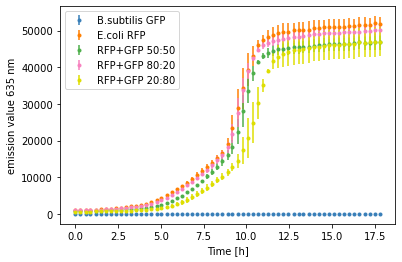

In [6]:
x = final_df_BE.loc["Time [h]"]
y1 = final_df_BE.loc["B.sub GFP mean"]
y_error1 = final_df_BE.loc["B.sub GFP std"]

y2 = final_df_BE.loc["DH5a RFP mean"]
y_error2 = final_df_BE.loc["DH5a RFP std"]

y3 = final_df_BE.loc["RFP+GFP 50:50 mean"]
y_error3 = final_df_BE.loc["RFP+GFP 50:50 std"]

y4 = final_df_BE.loc["RFP+GFP 80:20 mean"]
y_error4 = final_df_BE.loc["RFP+GFP 80:20 std"]

y5 = final_df_BE.loc["RFP+GFP 20:80 mean"]
y_error5 = final_df_BE.loc["RFP+GFP 20:80 std"]

plt.errorbar(x,y1,yerr = y_error1, fmt='o', markersize=3, color='#377eb8', label="B.subtilis GFP")
plt.errorbar(x,y2,yerr = y_error2, fmt='o', markersize=3, color='#ff7f00', label="E.coli RFP")
plt.errorbar(x,y3,yerr = y_error3, fmt='o', markersize=3, color='#4daf4a', label="RFP+GFP 50:50")
plt.errorbar(x,y4,yerr = y_error4, fmt='o', markersize=3, color='#f781bf', label="RFP+GFP 80:20")
plt.errorbar(x,y5,yerr = y_error5, fmt='o', markersize=3, color='#dede00', label="RFP+GFP 20:80")

plt.ylabel("emission value 635 nm")
plt.xlabel("Time [h]")
plt.legend()

plt.show()

As expected we can see, that B. subtilis does not express a red fluorescent marker, but E. coli does. The growth curves of E. coli alone and E. coli-B. subtilis co-cultures however show almost perfectly the sigmoid curve. These are ideal for a first try of modeling growth curves.

In [7]:
from modeling.modeling_functions import *

       Time           OD
0  0.000000   968.087432
1  0.300000  1038.754098
2  0.600000  1098.087432
3  0.883333  1143.087432
4  1.183333  1196.420765


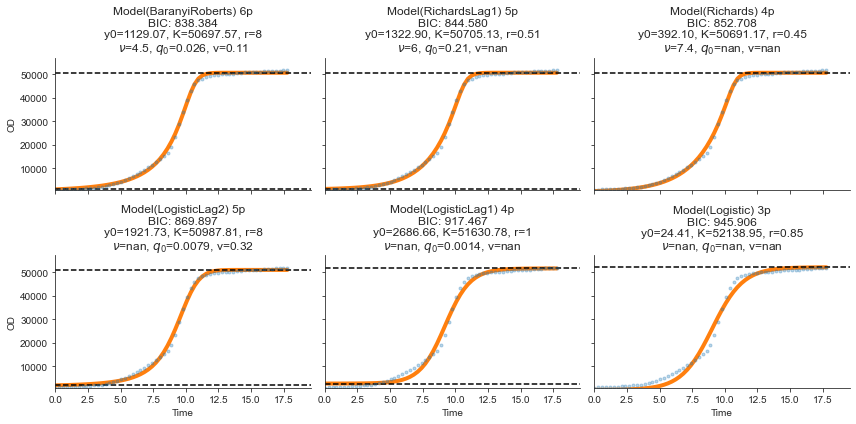

In [8]:
growth_model(x=final_df_BE.loc["Time [h]"],y=final_df_BE.loc["DH5a RFP mean"])

The growth_model function uses the package curveball and its function curveball.models.fit_model. In curveball six models are implemented and can be compared by their BIC. The smaller the BIC is, the better the modelling worked. In this case the BaranyiRoberts model worked best (upper left with BIC: 838.384).

With our growth_model function it is possible to chose a specific model as well.

       Time           OD
0  0.000000   968.087432
1  0.300000  1038.754098
2  0.600000  1098.087432
3  0.883333  1143.087432
4  1.183333  1196.420765


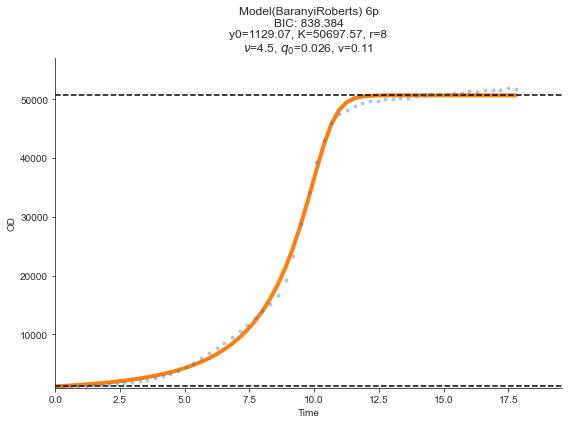

In [9]:
growth_model(x=final_df_BE.loc["Time [h]"],y=final_df_BE.loc["DH5a RFP mean"], model_name=curveball.baranyi_roberts_model.BaranyiRoberts)

       Time           OD
0  0.000000   968.087432
1  0.300000  1038.754098
2  0.600000  1098.087432
3  0.883333  1143.087432
4  1.183333  1196.420765


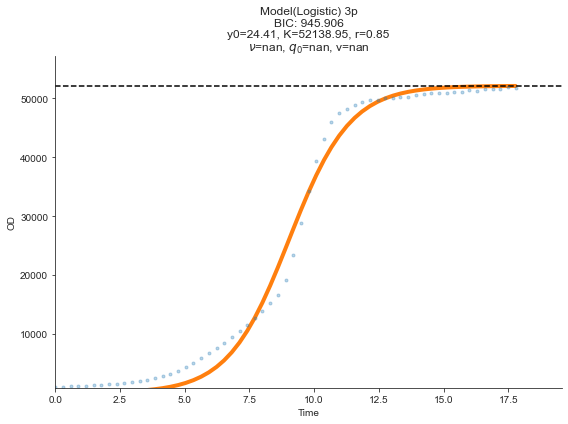

In [10]:
growth_model(x=final_df_BE.loc["Time [h]"],y=final_df_BE.loc["DH5a RFP mean"], model_name=curveball.baranyi_roberts_model.Logistic)

As you can see from these examples, the choice of the right model is important. Because of that we want to try out if one particular model works best for modeling our data. As the B. subtilis monoculture does not express RFP, we will leave it out for now.

       Time           OD
0  0.000000   968.087432
1  0.300000  1038.754098
2  0.600000  1098.087432
3  0.883333  1143.087432
4  1.183333  1196.420765
       Time          OD
0  0.000000  817.754098
1  0.300000  820.420765
2  0.600000  835.420765
3  0.883333  856.420765
4  1.183333  884.087432
       Time           OD
0  0.000000   928.420765
1  0.300000   964.754098
2  0.600000  1008.754098
3  0.883333  1041.754098
4  1.183333  1088.754098
       Time          OD
0  0.000000  613.754098
1  0.300000  617.087432
2  0.600000  631.420765
3  0.883333  644.754098
4  1.183333  660.754098


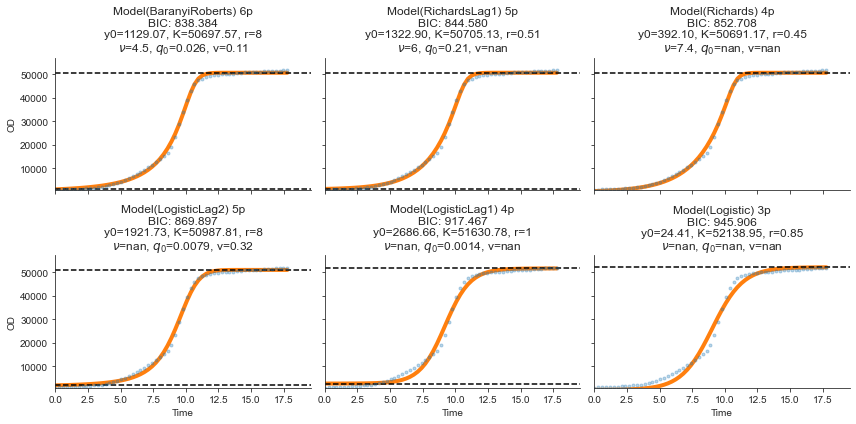

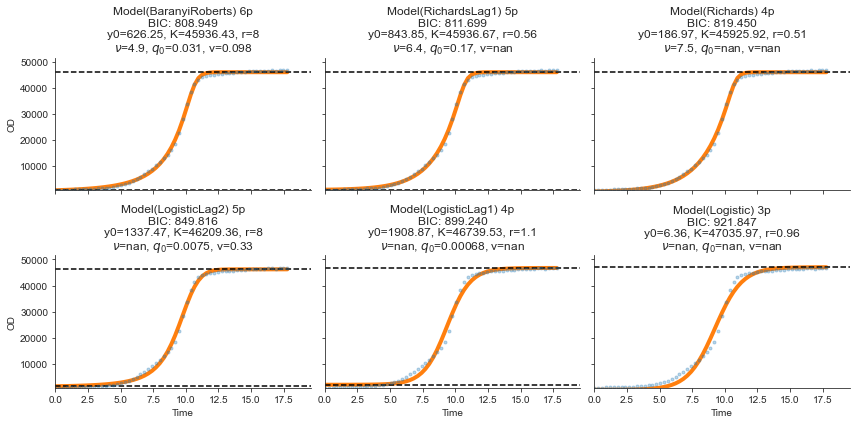

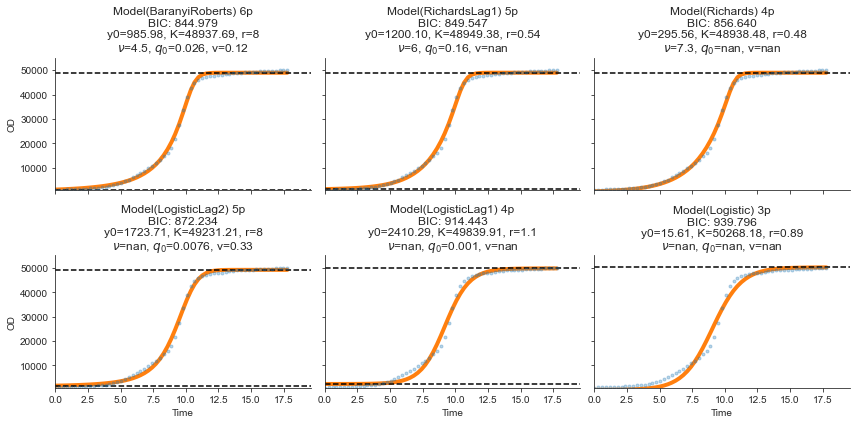

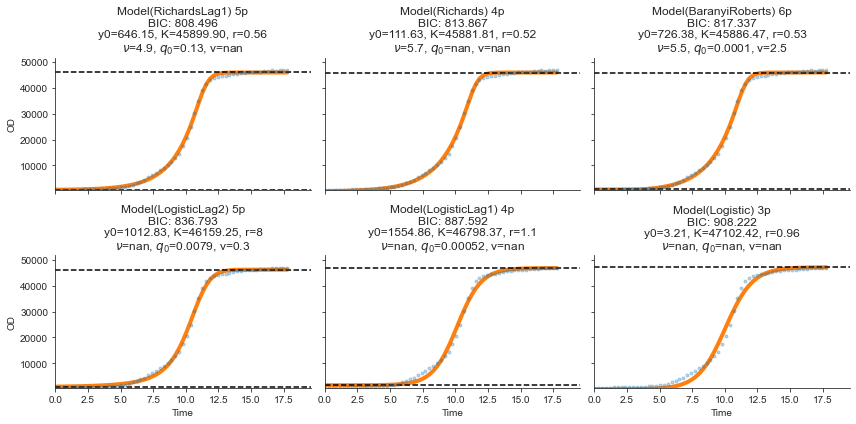

In [11]:
for key in name_dict_nr:
    if key == "B.sub GFP":
        continue
    growth_model(x=final_df_BE.loc["Time [h]"],y=final_df_BE.loc[key+" mean"])

In three out of four modelings of the curves, BarnyiRoberts was the best fitting model. In the fourth case the RichardsLag1 model was the one with the lowest BIC and BaranyiRoberts is only the third best model. In all cases Logistic was the model with the highest BIC.

However as we have seen before, all curves look very similar and almost like a sigmoid curve. Let us now have a look at some other data. The following co-culture was of E. coli with GFP and A. baylyi with mcherry. Here we look again at the emission at 635 nm.

In [12]:
sheet = "A.baylyi vs. E.coli"

df_AE = pd.read_excel(io=file_name, sheet_name=sheet)
df_AE.rename(index=df_AE["Cycle Nr."], inplace=True)
df_AE.drop(["Cycle Nr."], axis=1, inplace=True) 
df_AE = convert_time_in_df(df_AE, mod="hour")

background = ["A1", "A2", "A3", "A4", "A5", "A7", "A8", "A9", "A10", "A11", "A12"]
name_dict_nr = {"A.baylyi mcherry": ["B6", "B7", "B8"],
                "E.coli GFP": ["C6", "C7", "C8"],
                "mcherry+GFP 50:50": ["D6", "D7", "D8"],
                "mcherry+GFP 20:80": ["E6", "E7", "E8"],
                "mcherry+GFP 80:20": ["F6", "F7", "F8"]}
colum_name = [] 
for i in range(1,65):
    colum_name.append(i)
    
control_summary_AE = get_control_value(df_AE, background)
normalize(df_AE, control_summary_AE[0])
dict_for_final_AE = calculate_mean_and_std(name_dict_nr, df_AE)

final_df_AE = df_AE.loc[["Temp. [°C]", "Time [h]"]]
half_final_df_AE = pd.DataFrame.from_dict(dict_for_final_AE, orient='index', columns=colum_name)
final_df_AE = final_df_AE.append(half_final_df_AE)

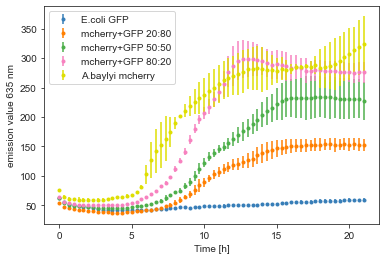

In [13]:
x = final_df_AE.loc["Time [h]"]
y1 = final_df_AE.loc["A.baylyi mcherry mean"]
y_error1 = final_df_AE.loc["A.baylyi mcherry std"]

y2 = final_df_AE.loc["E.coli GFP mean"]
y_error2 = final_df_AE.loc["E.coli GFP std"]

y3 = final_df_AE.loc["mcherry+GFP 50:50 mean"]
y_error3 = final_df_AE.loc["mcherry+GFP 50:50 std"]

y4 = final_df_AE.loc["mcherry+GFP 80:20 mean"]
y_error4 = final_df_AE.loc["mcherry+GFP 80:20 std"]

y5 = final_df_AE.loc["mcherry+GFP 20:80 mean"]
y_error5 = final_df_AE.loc["mcherry+GFP 20:80 std"]

plt.errorbar(x,y2,yerr = y_error2, fmt='o', markersize=3, color='#377eb8', label="E.coli GFP")
plt.errorbar(x,y5,yerr = y_error5, fmt='o', markersize=3, color='#ff7f00', label="mcherry+GFP 20:80")
plt.errorbar(x,y3,yerr = y_error3, fmt='o', markersize=3, color='#4daf4a', label="mcherry+GFP 50:50")
plt.errorbar(x,y4,yerr = y_error4, fmt='o', markersize=3, color='#f781bf', label="mcherry+GFP 80:20")
plt.errorbar(x,y1,yerr = y_error1, fmt='o', markersize=3, color='#dede00', label="A.baylyi mcherry")

plt.ylabel("emission value 635 nm")
plt.xlabel("Time [h]")
plt.legend()

plt.show()

This data does not look that perfect in comparison to our "perfect" data from before. Now we will compare the results of the different models again to see if the BarnyiRoberts model is still superior in most cases. This time we will include the E. coli monoculture.

       Time         OD
0  0.000000  75.392361
1  0.333333  64.392361
2  0.666667  61.392361
3  1.000000  60.059028
4  1.333333  59.725694
       Time         OD
0  0.000000  62.725694
1  0.333333  55.392361
2  0.666667  52.392361
3  1.000000  50.392361
4  1.333333  49.059028
       Time         OD
0  0.000000  62.392361
1  0.333333  54.725694
2  0.666667  51.059028
3  1.000000  49.392361
4  1.333333  49.059028
       Time         OD
0  0.000000  54.392361
1  0.333333  47.059028
2  0.666667  44.725694
3  1.000000  44.059028
4  1.333333  42.392361
       Time         OD
0  0.000000  64.059028
1  0.333333  56.059028
2  0.666667  54.059028
3  1.000000  52.059028
4  1.333333  51.059028


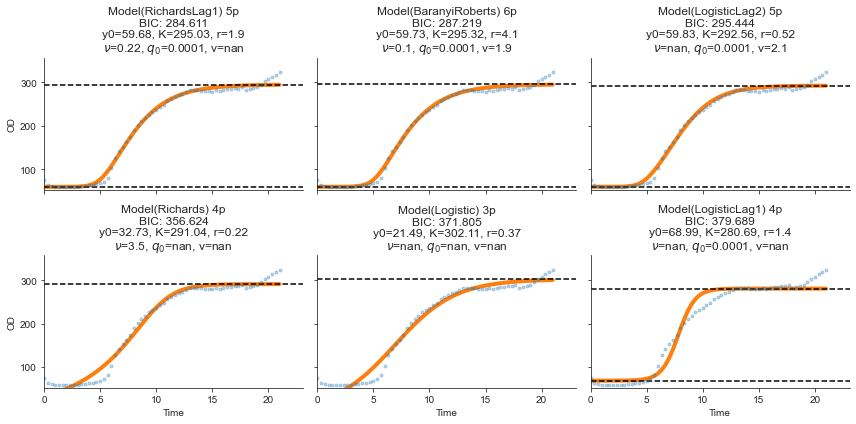

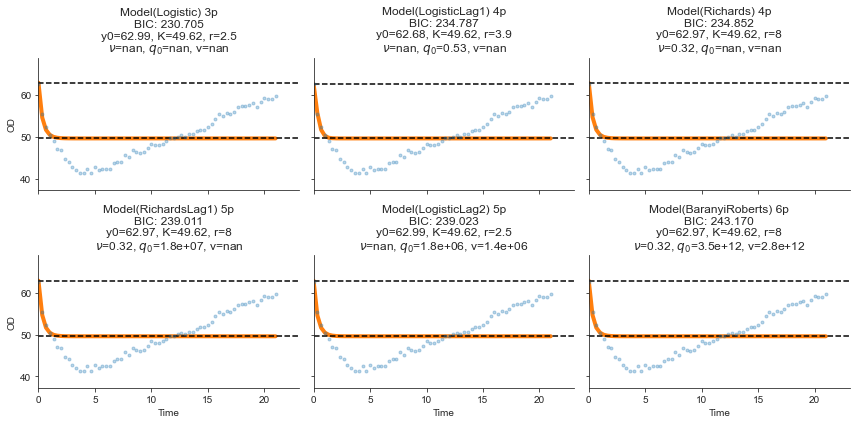

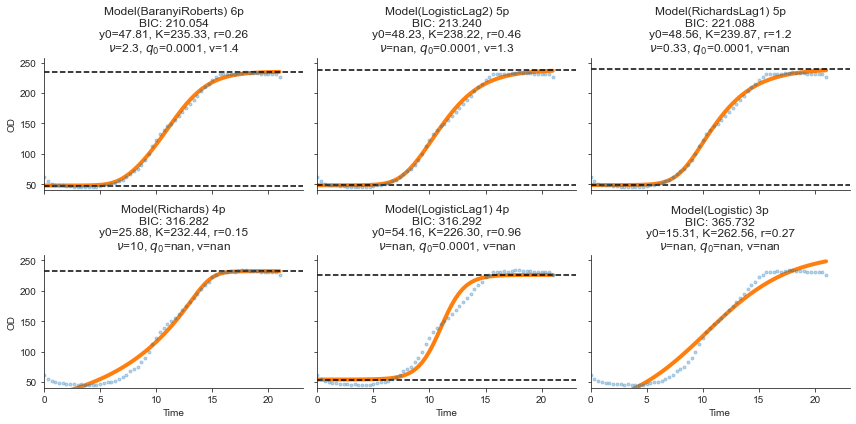

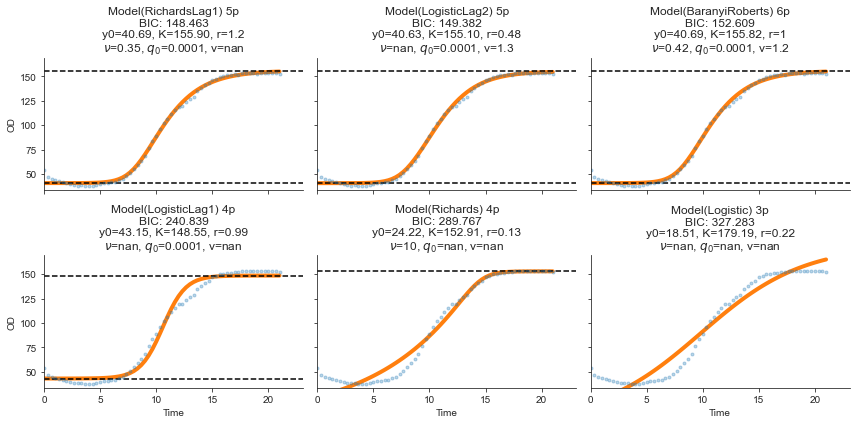

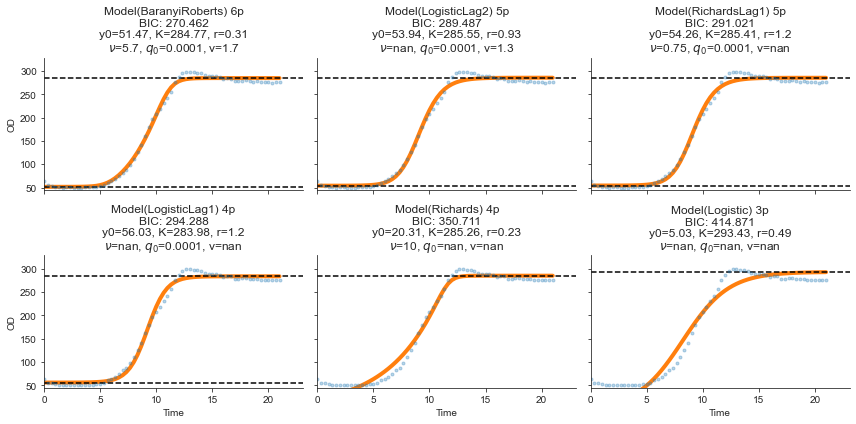

In [14]:
for key in name_dict_nr:
    growth_model(x=final_df_AE.loc["Time [h]"],y=final_df_AE.loc[key+" mean"])

For this measurement each BaranyiRoberts and RichardsLag1 model was the best for two curves. In three cases Logistic is the model with the highest BIC.

For E. coli with GFP a Logistic model was chosen as the best, however even this "best" model does not describe the behavior of this bacteria. This is mostlikely due to the lack of emission at 635 nm, therefore we advise a pre-sorting of data before data is modeled in order to prevent the modeling of meaningless data.

       Time         OD
0  0.000000  62.725694
1  0.333333  55.392361
2  0.666667  52.392361
3  1.000000  50.392361
4  1.333333  49.059028


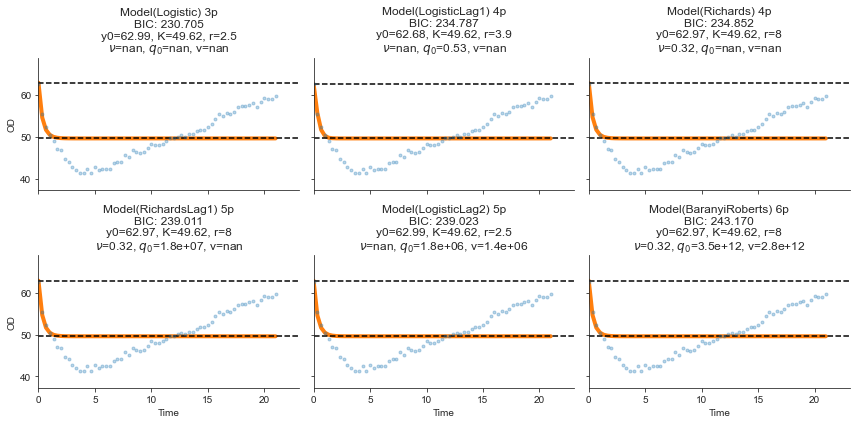

In [15]:
growth_model(x=final_df_AE.loc["Time [h]"],y=final_df_AE.loc["E.coli GFP mean"])

In the end we now want to have a look at a bit more complicated/noisy data. For this we have chosen two co-cultures, one with B. subtilis GFP and A. baylyi mCherry and the other one again with B.subtilis GFP and E. coli RFP. The second co-culture is not the same as the one shown in the beginning and this time we will work with the emission at 535 nm to measure GFP. This means, that both monocultures with E. coli RFP as well as A. baylyi mCherry should not emit at this wavelength.

In [16]:
sheet = "B.subtilis vs. A.baylyi"

df_BA = pd.read_excel(io=file_name, sheet_name=sheet)
df_BA.rename(index=df_BA["Cycle Nr."], inplace=True)
df_BA.drop(["Cycle Nr."], axis=1, inplace=True) 
df_BA = convert_time_in_df(df_BA, mod="hour")

background = ["H1", "H2", "H5", "H6"]
name_dict_nr = {"B.sub GFP": ["B2", "B3", "B4", "B6", "B7", "B8"], "DH5a RFP": ["C2", "C3", "C4"],
                "RFP+GFP 50:50": ["D2", "D3", "D4"], "RFP+GFP 80:20": ["E2", "E3", "E4"],
                "RFP+GFP 20:80": ["F2", "F3", "F4"],
                "A.baylyi mcherry": ["C6", "C7", "C8"], "mcherry+GFP 50:50": ["D6", "D7", "D8"],
                "mcherry+GFP 80:20": ["E6", "E7", "E8"], "mcherry+GFP 20:80": ["F6", "F7", "F8"]}
colum_name = [] 
for i in range(1,62):
    colum_name.append(i)
    
control_summary_BA = get_control_value(df_BA, background)
normalize(df_BA, control_summary_BA[0])
dict_for_final_BA = calculate_mean_and_std(name_dict_nr, df_BA)

final_df_BA = df_BA.loc[["Temp. [°C]", "Time [h]"]]
half_final_df_BA = pd.DataFrame.from_dict(dict_for_final_BA, orient='index', columns=colum_name)
final_df_BA = final_df_BA.append(half_final_df_BA)

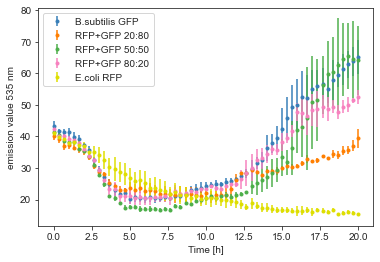

In [17]:
x = final_df_BA.loc["Time [h]"]
y1 = final_df_BA.loc["B.sub GFP mean"]
y_error1 = final_df_BA.loc["B.sub GFP std"] 

y2 = final_df_BA.loc["DH5a RFP mean"]
y_error2 = final_df_BA.loc["DH5a RFP std"]

y3 = final_df_BA.loc["RFP+GFP 50:50 mean"]
y_error3 = final_df_BA.loc["RFP+GFP 50:50 std"]

y4 = final_df_BA.loc["RFP+GFP 80:20 mean"]
y_error4 = final_df_BA.loc["RFP+GFP 80:20 std"]

y5 = final_df_BA.loc["RFP+GFP 20:80 mean"]
y_error5 = final_df_BA.loc["RFP+GFP 20:80 std"]


y6 = final_df_BA.loc["A.baylyi mcherry mean"]
y_error6 = final_df_BA.loc["A.baylyi mcherry std"]

y7 = final_df_BA.loc["mcherry+GFP 50:50 mean"]
y_error7 = final_df_BA.loc["mcherry+GFP 50:50 std"]

y8 = final_df_BA.loc["mcherry+GFP 80:20 mean"]
y_error8 = final_df_BA.loc["mcherry+GFP 80:20 std"]

y9 = final_df_BA.loc["mcherry+GFP 20:80 mean"]
y_error9 = final_df_BA.loc["mcherry+GFP 20:80 std"]


plt.errorbar(x,y1,yerr = y_error1, fmt='o', markersize=3, color='#377eb8', label="B.subtilis GFP")
plt.errorbar(x,y5,yerr = y_error5, fmt='o', markersize=3, color='#ff7f00', label="RFP+GFP 20:80")
plt.errorbar(x,y3,yerr = y_error3, fmt='o', markersize=3, color='#4daf4a', label="RFP+GFP 50:50")
plt.errorbar(x,y4,yerr = y_error4, fmt='o', markersize=3, color='#f781bf', label="RFP+GFP 80:20")
plt.errorbar(x,y2,yerr = y_error2, fmt='o', markersize=3, color='#dede00', label="E.coli RFP")

plt.ylabel("emission value 535 nm")
plt.xlabel("Time [h]")
plt.legend()

plt.show()

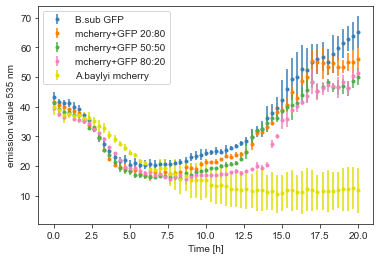

In [18]:
plt.errorbar(x,y1,yerr = y_error1, fmt='o', markersize=3, color='#377eb8', label="B.sub GFP")
plt.errorbar(x,y8,yerr = y_error8, fmt='o', markersize=3, color='#ff7f00', label="mcherry+GFP 20:80")
plt.errorbar(x,y7,yerr = y_error7, fmt='o', markersize=3, color='#4daf4a', label="mcherry+GFP 50:50")
plt.errorbar(x,y9,yerr = y_error9, fmt='o', markersize=3, color='#f781bf', label="mcherry+GFP 80:20")
plt.errorbar(x,y6,yerr = y_error6, fmt='o', markersize=3, color='#dede00', label="A.baylyi mcherry")

plt.ylabel("emission value 535 nm")
plt.xlabel("Time [h]")
plt.legend()

plt.show()

In these two plots we can see that all cultures seemed to have partially died and only started to grow after around five hours. We will test if this will be a problem for the modeling and if yes how we can process the data to prevent problems.

       Time         OD
0  0.000000  43.280055
1  0.333333  41.613388
2  0.666667  41.280055
3  1.000000  41.280055
4  1.333333  39.780055


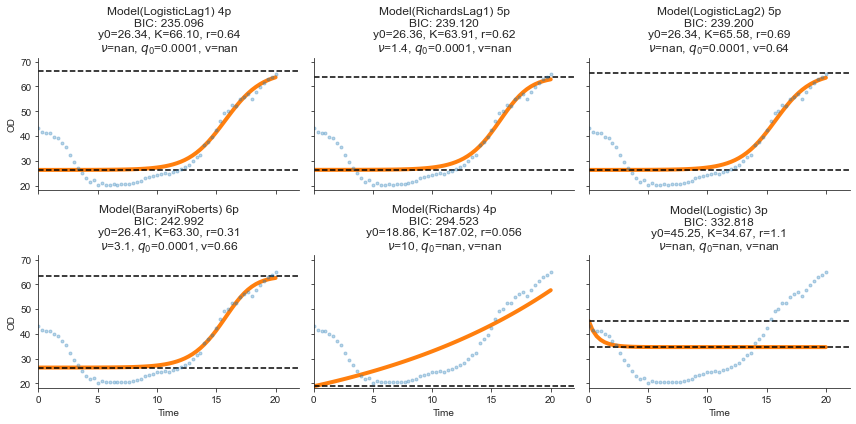

In [19]:
growth_model(x=final_df_BA.loc["Time [h]"],y=final_df_BA.loc["B.sub GFP mean"])

Next we tested if the modeling improves, if we leave out the first five hours.

       Time         OD
0  0.000000  20.280055
1  0.333333  20.946721
2  0.666667  20.446721
3  1.000000  20.446721
4  1.333333  20.780055


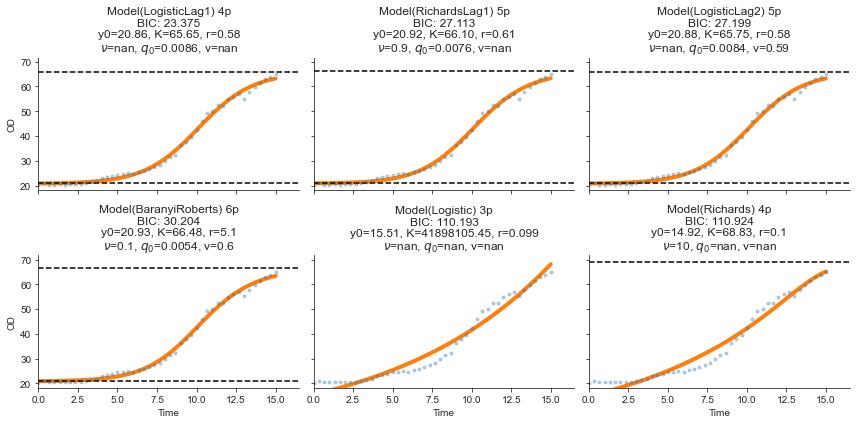

In [20]:
growth_model(x=final_df_BA.loc["Time [h]"],y=final_df_BA.loc["B.sub GFP mean", 16:])

With the simple exclusion of the first 15 measurements (time 0 to 5 h) the BIC was reduced from 235.096 to 23.375. In both cases the LogisticLag1 model was the best.

We now can compare the models for all the curves to find out, if one model prooves itself as the best or worse. This time we will exclude the monocultures of E. coli and A. baylyi.

       Time         OD
0  0.000000  20.280055
1  0.333333  20.946721
2  0.666667  20.446721
3  1.000000  20.446721
4  1.333333  20.780055
       Time         OD
0  0.000000  17.780055
1  0.333333  17.780055
2  0.666667  17.113388
3  1.000000  17.113388
4  1.333333  17.113388
       Time         OD
0  0.000000  21.113388
1  0.333333  20.446721
2  0.666667  20.780055
3  1.000000  20.446721
4  1.333333  20.446721
       Time         OD
0  0.000000  23.780055
1  0.333333  23.113388
2  0.666667  23.780055
3  1.000000  22.780055
4  1.333333  23.113388
       Time         OD
0  0.000000  18.113388
1  0.333333  16.780055
2  0.666667  16.780055
3  1.000000  16.446721
4  1.333333  16.113388
       Time         OD
0  0.000000  18.113388
1  0.333333  18.446721
2  0.666667  17.113388
3  1.000000  16.780055
4  1.333333  16.446721
       Time         OD
0  0.000000  19.446721
1  0.333333  19.113388
2  0.666667  18.113388
3  1.000000  17.446721
4  1.333333  17.780055


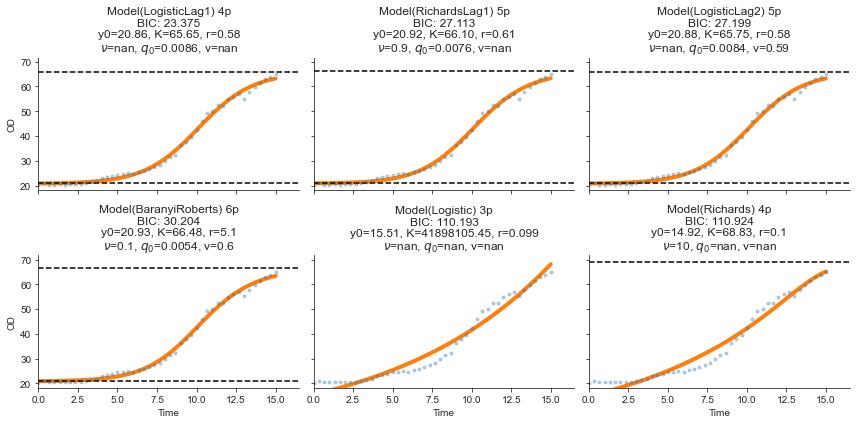

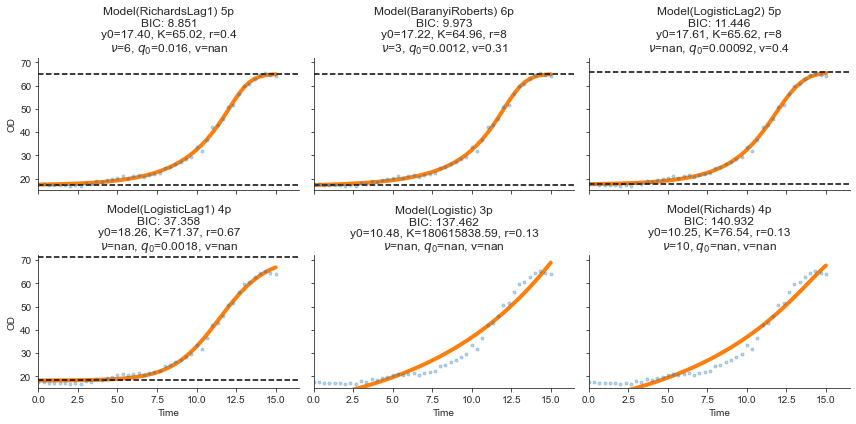

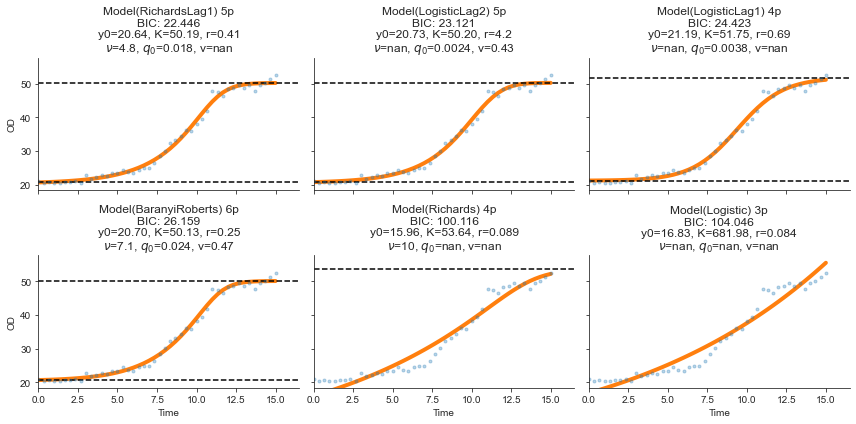

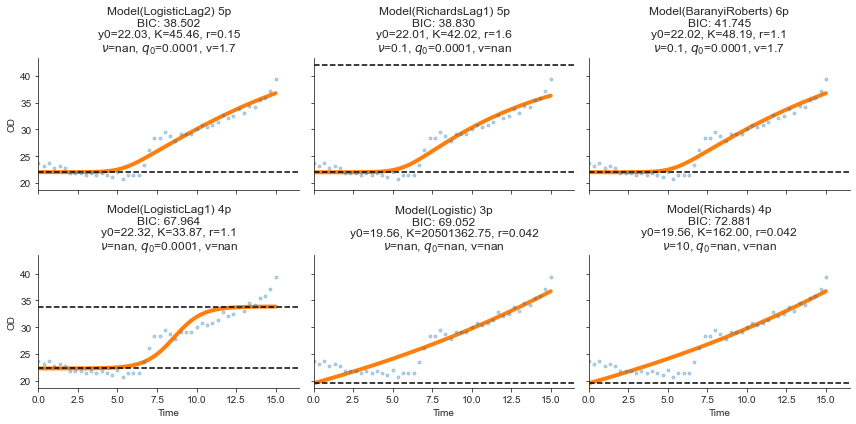

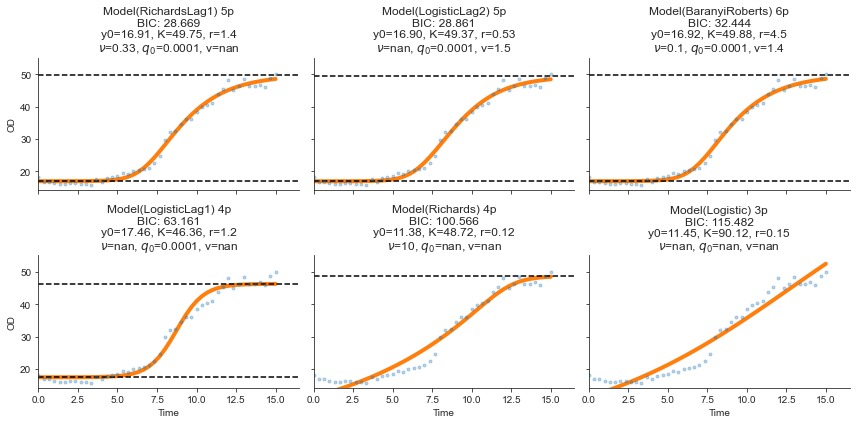

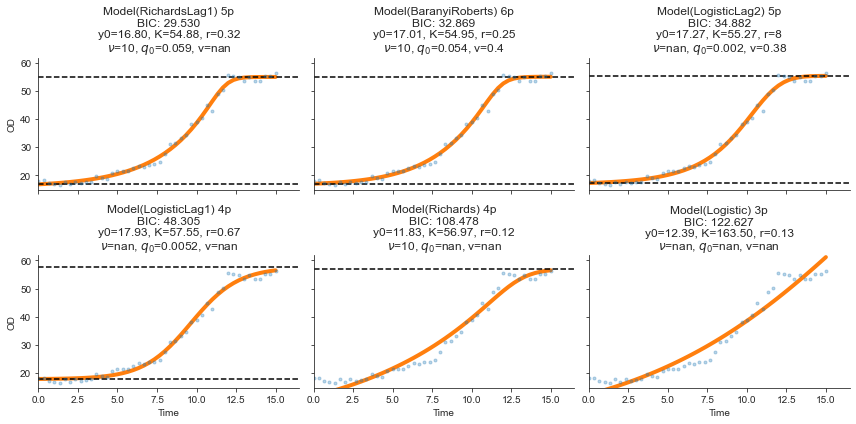

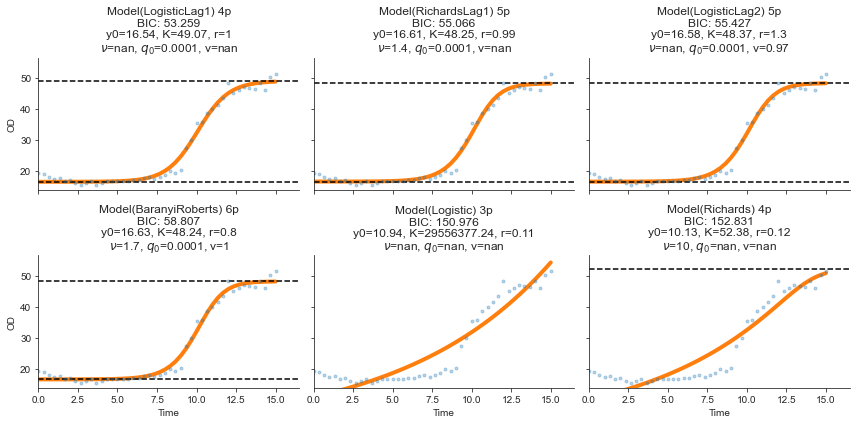

In [21]:
for key in name_dict_nr:
    if key == "DH5a RFP" or key == "A.baylyi mcherry":
        continue
    growth_model(x=final_df_BA.loc["Time [h]"],y=final_df_BA.loc[key+" mean", 16:]) 

In this data five out of the seven curves can be modeled best with the RichardsLag1 with BICs from 8.851 to 53.259. The other two have either the LogisticLag1 or LogisticLag2 as the model with the lowest BIC. The worst models here were Logistic and Richards.

To sum it up, we have shown how to use our growth_model function and explored the different models from curveball.models. We tried to find the best model for all cases, but unfortunately biological data varies, therefore we couldn't find a one-fit-all model. The best models for the data used have been BaranyiRoberts and RichardsLog1. 

Additionally the worst models were compared. All three data sets agree in the view that a Logistic model often has the highest or one of the three highest BICs. Therefore we advise against chosing this model for your data.

Lastly, it is important to have a close look at your data before modeling it to eliminate meaningless data and parts of the data that are not supposed to be modeled.